In [1]:
from agros import Agros

In [2]:
test = Agros()

In [3]:
test.download_data()

Data file already exists, skipping download...


,Entity,Year,tfp,output,inputs,ag_land_index,labor_index,capital_index,materials_index,output_quantity,...,ag_land_quantity,labor_quantity,capital_quantity,machinery_quantity,livestock_quantity,fertilizer_quantity,animal_feed_quantity,cropland_quantity,pasture_quantity,irrigation_quantity
0,Afghanistan,1961,65.0814,44.8285,68.8807,91.6812,44.5145,141.5215,35.9132,2566730,...,10571,1704,8866,5,6339,57345,2068912,7700,30000,2380
1,Afghanistan,1962,64.0637,45.6182,71.2075,92.2016,45.0207,163.6547,36.3829,2611942,...,10631,1723,10253,6,6228,58146,2082012,7760,30000,2380
2,Afghanistan,1963,61.6217,45.9729,74.6051,92.6352,45.5528,202.0577,37.0801,2632254,...,10681,1743,12659,8,6547,59694,2007829,7810,30000,2380
3,Afghanistan,1964,65.1109,49.0775,75.3752,93.1816,46.1108,203.8875,37.5294,2810010,...,10744,1765,12773,8,6732,60006,2140272,7873,30000,2380
4,Afghanistan,1965,63.8587,51.2121,80.1960,93.1990,46.6948,270.9746,38.5949,2932230,...,10746,1787,16976,12,6946,61821,2171226,7875,30000,2380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12177,Zimbabwe,2015,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,2191374,...,2574,4184,8379,1154,5654,93807,975873,2252,12100,182
12178,Zimbabwe,2016,94.8110,98.1051,103.4744,103.8526,101.2662,97.9759,128.2406,2149850,...,2673,4237,8210,1174,5705,146857,1000004,2349,12100,184
12179,Zimbabwe,2017,101.9830,104.9815,102.9402,99.6960,102.3605,96.4853,141.3410,2300538,...,2566,4283,8085,1180,5601,160356,1113784,2240,12100,187
12180,Zimbabwe,2018,118.1959,121.0832,102.4428,102.8520,103.4662,95.3222,124.3694,2653386,...,2647,4330,7987,1201,5681,146379,940395,2321,12100,187


In [4]:
test.get_countries()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Caribbean',
 'Central Africa',
 'Central African Republic',
 'Central America',
 'Central Asia',
 'Central Europe',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 'Democratic Republic of Congo',
 'Denmark',
 'Developed Asia',
 'Developed countries',
 'Djibouti',
 'Dominican Republic',
 'East Africa',
 'Eastern Europe',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'Fiji',
 'Finland',
 'Former Soviet Union',
 'France',
 'French Guian

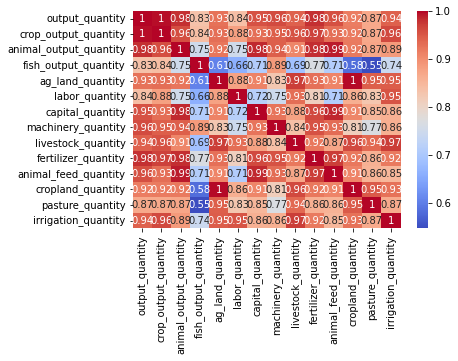

In [5]:
test.plot_correlation()

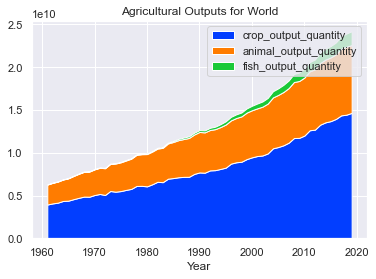

In [6]:
test.areachart_country_output()


#  include type error if not string

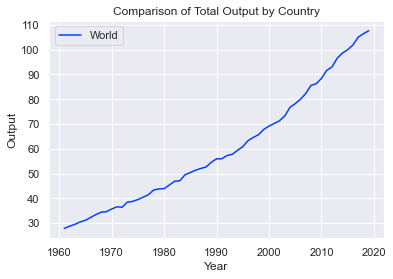

In [7]:
test.plot_country_output()

# check if plot informs comparision. Shouldn't it be as the one above?
# include type error for variables types

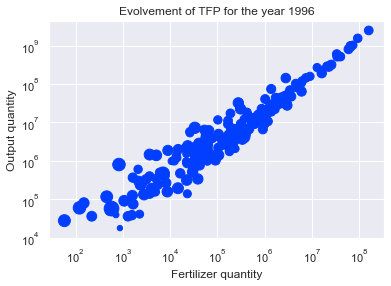

In [8]:
test.gapminder(1996)

# include type error for variable type


In [60]:
"""
The OS module in Python provides a way of using operating system dependent functionality.
"""
import os
import urllib.request
from typing import List, Optional, Union
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


class Agros:
    """
    A class for downloading and processing agricultural data.
    """

    def __init__(self):
        """
        Initializes the Agros class.
        """
        self.url = (
            "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/"
            "Agricultural%20total%20factor%20productivity%20(USDA)/"
            "Agricultural%20total%20factor%20productivity%20(USDA).csv"
        )
        self.filename = "Agricultural total factor productivity (USDA).csv"
        self.download_dir = os.path.join(os.getcwd(), "downloads")
        self.download_path = os.path.join(self.download_dir, self.filename)
        self.dataset = None

    def download_data(self):
        """
        Downloads data from a given URL and saves it to a specified file path.

        Returns
        -------
            pandas.DataFrame: The downloaded dataset.
        """
        if os.path.isfile(self.download_path):
            self.dataset = pd.read_csv(
                "downloads/Agricultural total factor productivity (USDA).csv"
            )
            return self.dataset

        if not os.path.exists(self.download_dir):
            os.makedirs(self.download_dir)
            print(f"Created directory: {self.download_dir}")

        print(f"Downloading data file from {self.url}...")
        urllib.request.urlretrieve(self.url, self.download_path)

        print(f"Data file downloaded and saved to {self.download_path}")
        self.dataset = pd.read_csv(
            "downloads/Agricultural total factor productivity (USDA).csv"
        )
        return self.dataset

    def get_countries(self):
        """
        Returns a list of available countries in the dataset.

        Returns
        -------
        list
            A list of strings representing the available countries in the dataset.
        """
        if self.dataset is None:
            self.download_data()

        return list(self.dataset["Entity"].unique())

    def plot_correlation(self) -> None:

        """
        Plots a heatmap of the correlations between the specified columns.

        Parameters
        ----------
        columns : list of str
            A list of strings representing the columns to include in the correlation analysis.

        Returns
        -------
        None
            This function has no return value.
        """
        # load data
        if self.dataset is None:
            self.download_data()

        data_frame = self.dataset.filter(regex="_quantity")
        corr = data_frame.corr()
        sns.heatmap(corr, cmap="coolwarm", annot=True, annot_kws={'size': 8})

    def areachart_country_output(
        self, country: Optional[str] = "World", normalize: bool = False
    ) -> None:

        """
        Plots an area chart of the  "_output_" columns for a given country

        Parameters
        ---------------
        country: string
            Country selected to plot area chart of the outputs, if *NONE* or
            'World' should plot the sum for all *distinct* countries
        normalize: boolean
            If True, normalizes the output in relative terms: each year, output
             should always be 100%

        Raises
        -------
            ValueError(f'{country} is not a valid')

        Returns
        -------
            Area Chart: This function returns area chart with outputs of a country by year

        """

        # Load data
        if self.dataset is None:
            self.download_data()

        data_frame = self.dataset.filter(regex="_output_|Year|Entity")

        # Filter by country if specified
        if country is not None:
            if country.lower() == "world" or country is None:
                data_frame = data_frame.groupby("Year").sum().reset_index()
            else:
                data_frame = data_frame[data_frame["Entity"] == country.capitalize()]
                if data_frame.empty:
                    raise ValueError(f"Country '{country}' not found in dataset.")
                data_frame = data_frame.drop("Entity", axis=1)

        # Normalize if specified
        if normalize:
            data_frame.iloc[:, 1:] = (
                data_frame.iloc[:, 1:]
                .div(data_frame.iloc[:, 1:].sum(axis=1), axis=0)
                .multiply(100)
            )

        # Plot an area chart for the output columns
        sns.set_theme(palette="bright")
        plt.stackplot(
            data_frame["Year"],
            data_frame.iloc[:, 1:].values.T,
            labels=data_frame.iloc[:, 1:].columns,
        )
        plt.legend()
        plt.xlabel("Year")
        plt.title(
            f'Agricultural Outputs {"for " + country if country else "All Countries"}'
        )
        plt.show()

    def plot_country_output(self, countries: Union[str, List[str]] = "World") -> None:

        """
        Plots the total output of one or more countries over time.

        Parameters
        ----------
        countries : str or list of str
            The name(s) of the country(ies) to plot.

        Returns
        -------
        None
        """

        # load data
        if self.dataset is None:
            self.download_data()

        data_frame = self.dataset

        if isinstance(countries, str):
            countries = [countries]

        # check if all specified countries are in dataset
        for country in countries:
            if country not in data_frame["Entity"].unique():
                raise ValueError(f"Country '{country}' not found in dataset.")

        # plot data
        fig, ax_plot = plt.subplots()
        for country in countries:
            country_data = data_frame[data_frame["Entity"] == country]
            ax_plot.plot(country_data["Year"], country_data["output"], label=country)

        ax_plot.legend()
        ax_plot.set_xlabel("Year")
        ax_plot.set_ylabel("Output")
        ax_plot.set_title("Comparison of Total Output by Country")

        plt.show()

    def gapminder(self, year: int) -> None:

        """
        Creates a scatter plot of fertilizer quantity vs. output quantity
        for a specific year in the Gapminder dataset, where the area of each
        dot represents the TFP (total factor productivity) for the respective year.

        Parameters
        ----------
        year : int
            The year for which to create the scatter plot.

        Raises
        ------
        TypeError
            If the year argument is not an integer.

        Returns
        -------
        None

        Notes
        -----
        This method assumes that the dataset has already been downloaded and loaded
        into a pandas DataFrame with columns "Year", "fertilizer_quantity", "output_quantity",
        and "tfp". If these columns are not present, an error will be raised.
        """

        if self.dataset is None:
            self.download_data()

        # Check that the year argument is an int
        if not isinstance(year, int):
            raise TypeError("Year argument must be an integer.")

        # Load the gapminder dataset into a pandas DataFrame
        data_frame = self.dataset

        # Filter the DataFrame to include only the selected year
        data_frame_year = data_frame[data_frame["Year"] == year]

        # Create a scatter plot of fertilizer quantity vs. output quantity
        plt.figure(figsize=(6.4,4.8))
        axis = sns.scatterplot(
            data=data_frame_year,
            x="fertilizer_quantity",
            y="output_quantity",
            size="tfp",
            sizes=(25,250),
            alpha=0.6,
        )
        axis.set(           
            xlabel="Fertilizer quantity",
            ylabel="Output quantity",
            xscale="log",
            yscale="log",
            title=f"Evolvement of TFP for the year {year}",
        )
        plt.show()


In [65]:
final = Agros()

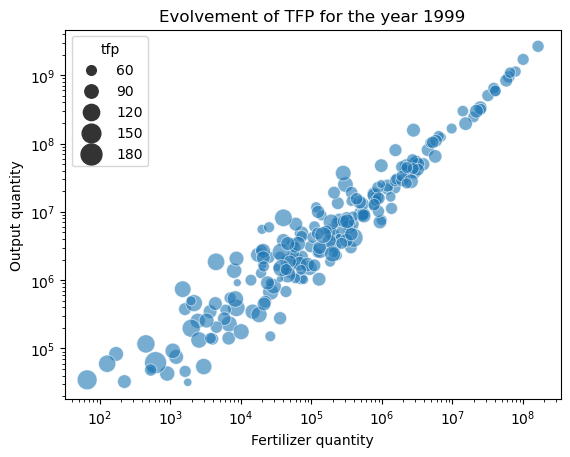

In [66]:
final.gapminder(1999)

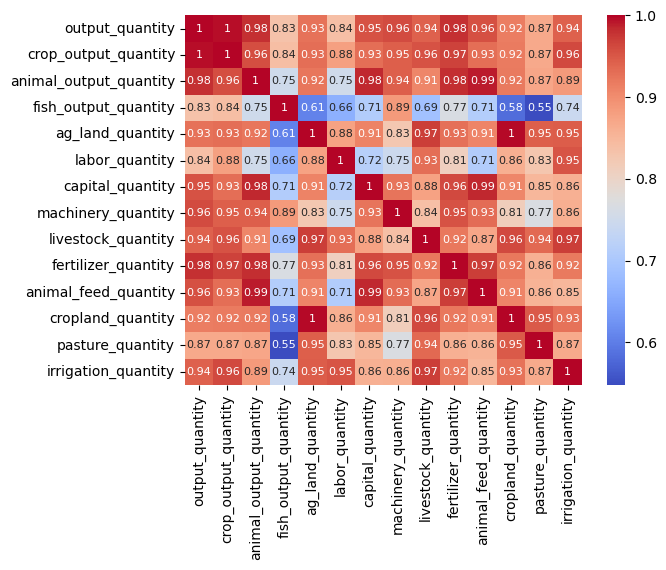

In [63]:
final.plot_correlation()

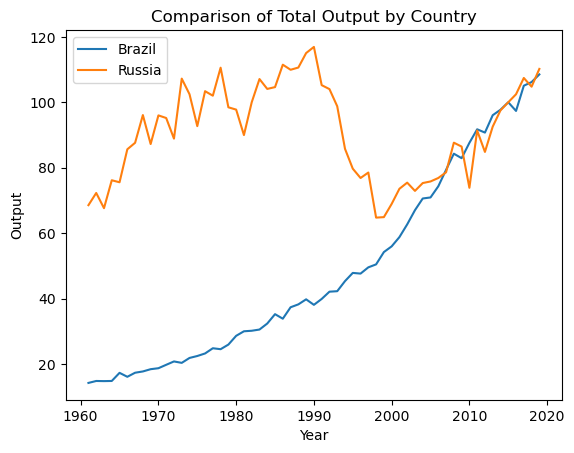

In [64]:
final.plot_country_output(("Brazil","Russia"))